INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwy26trlf/_h6v3ik6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwy26trlf/gry0w0xs.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=4377', 'data', 'file=/tmp/tmpwy26trlf/_h6v3ik6.json', 'init=/tmp/tmpwy26trlf/gry0w0xs.json', 'output', 'file=/tmp/tmpwy26trlf/prophet_modellb46_nk0/prophet_model-20230426180327.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:03:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:03:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


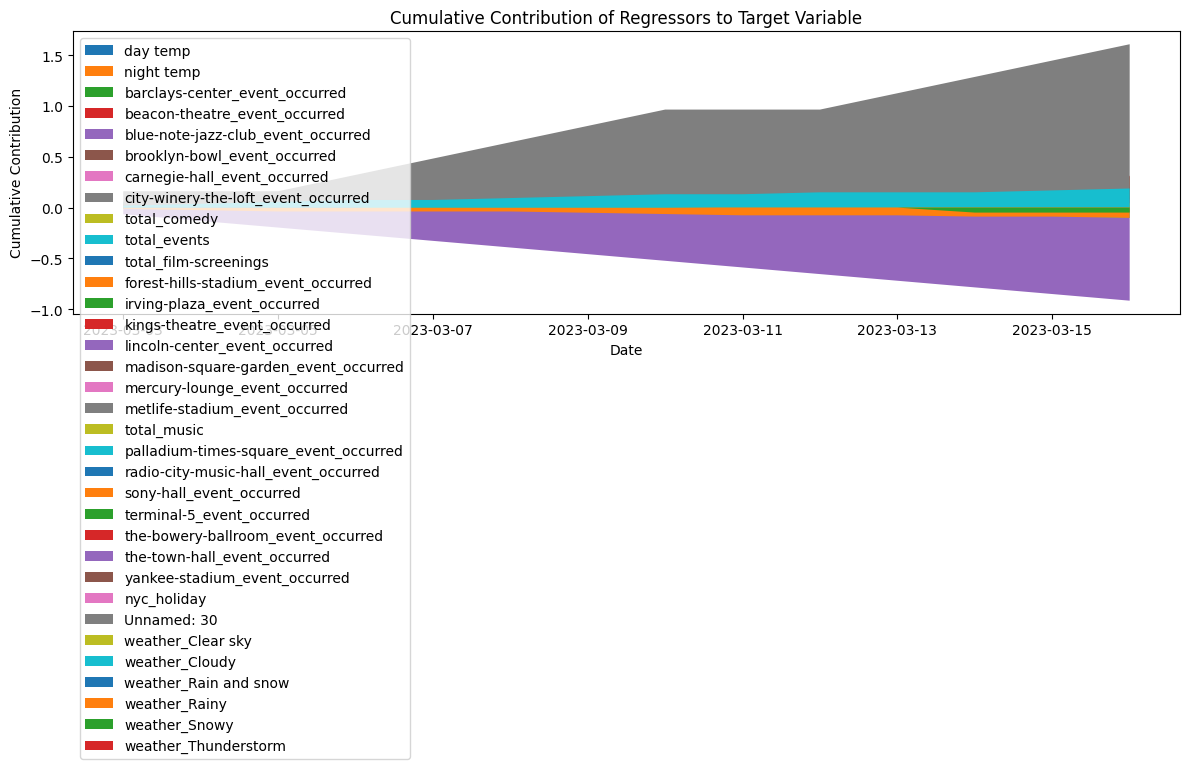

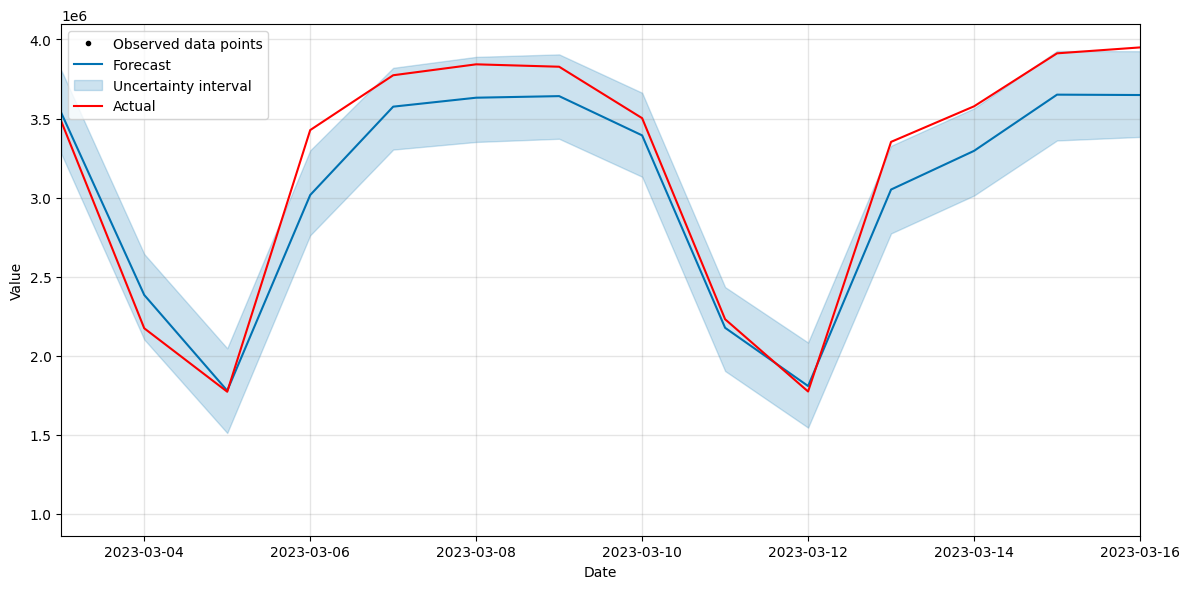

5.561449222811355

In [ ]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
import numpy as np
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics

# Load the data
data = pd.read_csv('/content/Final All New Signals_with_weekday.csv')
data['date'] = pd.to_datetime(data['date'])
start_date = '2020-04-20'
end_date = '2023-03-16'
data = data[(data['date'] >= start_date) & (data['date'] <= end_date)]

# Perform one-hot encoding for 'weather' column
data = pd.get_dummies(data, prefix=['weather'], columns=['weather'])

# Rename columns for Prophet requirement
data = data.rename(columns={"date": "ds", "ridership": "y"})

# Drop any rows with null values
data = data.dropna()

# Create training and testing sets
fold7 = data[(data['ds'] >= "2022-02-01") & (data['ds'] <= "2023-03-02")]
testing = data[(data['ds'] >= "2023-03-03") & (data['ds'] <= "2023-03-16")]

# Initialize the Prophet model
m = Prophet(changepoint_prior_scale=0.010, seasonality_prior_scale=10, holidays_prior_scale=10, seasonality_mode='multiplicative')

# Add the regressors to the model for both training and testing sets
for column in fold7.columns:
    if column != 'ds' and column != 'y':
        m.add_regressor(column)

# Fit the model to the training set
m.fit(fold7)

# Make predictions for the testing set
forecast = m.predict(testing)

# Create a stacked area plot for cumulative contributions of regressors
fig, ax = plt.subplots(figsize=(12, 6))

# Iterate through each regressor and plot its cumulative contribution to the target variable
for column in fold7.columns:
    if column != 'ds' and column != 'y':
        ax.fill_between(testing['ds'], forecast[column].cumsum(), label=column)

ax.set_title('Cumulative Contribution of Regressors to Target Variable')
ax.set_xlabel('Date')
ax.set_ylabel('Cumulative Contribution')
ax.legend(loc='upper left') # Update legend position
plt.tight_layout() # Add tight layout to prevent overlapping
plt.show()

# Plot the actual values and forecast
fig = m.plot(forecast, xlabel='Date', ylabel='Value', figsize=(12, 6)) # Increase plot size
fig.gca().set_xlim([testing['ds'].min(), testing['ds'].max()])
dates = testing['ds']
plt.plot(dates, testing['y'], label='Actual', color='red')
plt.legend()
plt.tight_layout() # Add tight layout to prevent overlapping
plt.show()

# Calculate Mean Absolute Percentage Error (MAPE)
y_true = testing['y'].values
y_pred = forecast['yhat'].values
absolute_percentage_error = np.abs((y_true - y_pred) / y_true)
mean_absolute_percentage_error = np.mean(absolute_percentage_error) * 100
mean_absolute_percentage_error


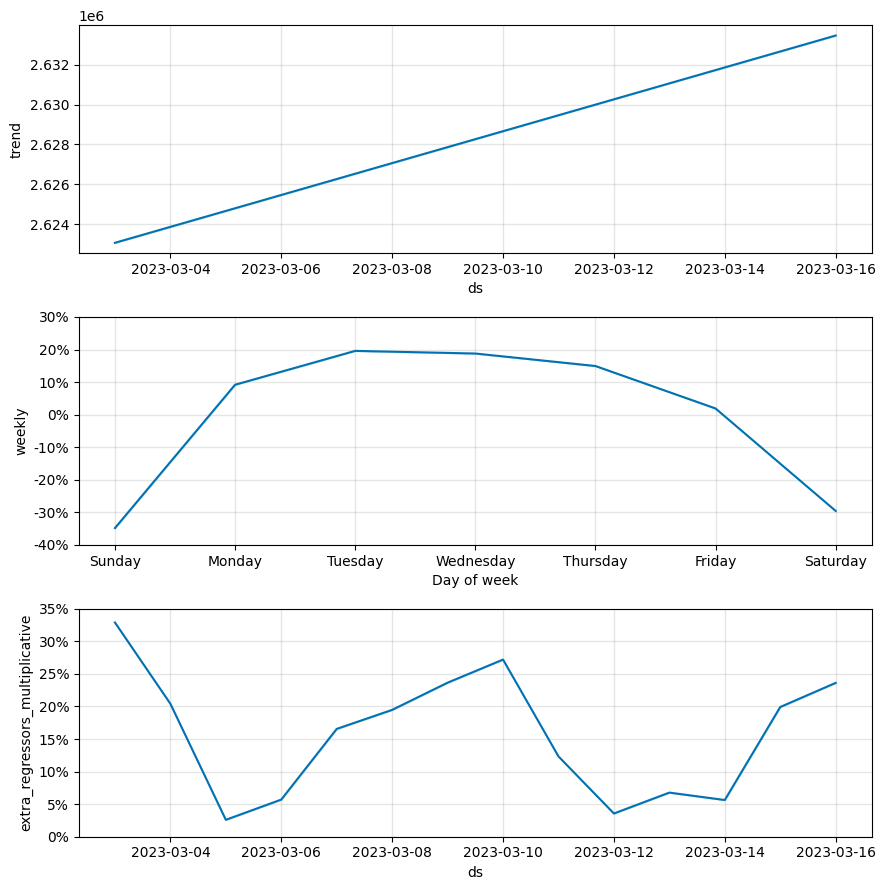

In [ ]:
fig = m.plot_components(forecast)
plt.show()


In [ ]:
regressor_values

ds  extra_regressors_multiplicative
0  2023-03-03                         0.328843
1  2023-03-04                         0.204089
2  2023-03-05                         0.025954
3  2023-03-06                         0.057010
4  2023-03-07                         0.165491
5  2023-03-08                         0.194730
6  2023-03-09                         0.236457
7  2023-03-10                         0.271933
8  2023-03-11                         0.123268
9  2023-03-12                         0.035662
10 2023-03-13                         0.067721
11 2023-03-14                         0.056352
12 2023-03-15                         0.199118
13 2023-03-16                         0.236162

In [ ]:
# Create an empty dataframe to store the contributions
contributions = pd.DataFrame()

# Iterate through each regressor and calculate its contribution for each time period
for column in fold7.columns:
    if column != 'ds' and column != 'y':
        contributions[column] = forecast[column]

# Add the date column from the testing dataframe to the contributions dataframe
contributions['date'] = testing['ds'].values

# Set the date column as the index of the contributions dataframe
contributions.set_index('date', inplace=True)


In [ ]:
contributions

day temp  night temp  barclays-center_event_occurred  \
date                                                               
2023-03-03  0.010665    0.005877                        0.000000   
2023-03-04  0.012031    0.005877                        0.006154   
2023-03-05  0.005885    0.006815                        0.006154   
2023-03-06  0.007251    0.004938                        0.000000   
2023-03-07  0.012031    0.005877                        0.006154   
2023-03-08  0.010665    0.009162                        0.006154   
2023-03-09  0.008616    0.007754                        0.006154   
2023-03-10  0.009982    0.006815                        0.000000   
2023-03-11  0.012031    0.005877                        0.006154   
2023-03-12  0.009982    0.007754                        0.006154   
2023-03-13  0.012031    0.005877                        0.000000   
2023-03-14  0.016812    0.006815                        0.006154   
2023-03-15  0.012031    0.009162                        0.000000   
2023-03-16  0.004519    0.009162                        0.006154   

            beacon-theatre_event_occurred  blue-note-jazz-club_event_occurred  \
date                                                                            
2023-03-03                        0.03299                           -0.065435   
2023-03-04                        0.03299                           -0.065435   
2023-03-05                        0.00000                           -0.065435   
2023-03-06                        0.00000                           -0.065435   
2023-03-07                        0.00000                           -0.065435   
2023-03-08                        0.00000                           -0.065435   
2023-03-09                        0.03299                           -0.065435   
2023-03-10                        0.03299                           -0.065435   
2023-03-11                        0.03299                           -0.065435   
2023-03-12                        0.00000                           -0.065435   
2023-03-13                        0.00000                           -0.065435   
2023-03-14                        0.00000                           -0.065435   
2023-03-15                        0.00000                           -0.065435   
2023-03-16                        0.03299                           -0.065435   

            brooklyn-bowl_event_occurred  carnegie-hall_event_occurred  \
date                                                                     
2023-03-03                      0.009519                      0.000000   
2023-03-04                      0.009519                      0.000000   
2023-03-05                      0.009519                      0.000000   
2023-03-06                      0.000000                      0.000000   
2023-03-07                      0.000000                      0.000000   
2023-03-08                      0.000000                      0.000000   
2023-03-09                      0.000000                      0.000000   
2023-03-10                      0.009519                      0.000000   
2023-03-11                      0.009519                      0.000000   
2023-03-12                      0.009519                      0.000000   
2023-03-13                      0.000000                      0.000000   
2023-03-14                      0.000000                      0.000000   
2023-03-15                      0.000000                      0.033912   
2023-03-16                      0.009519                      0.000000   

            city-winery-the-loft_event_occurred  total_comedy  total_events  \
date                                                                          
2023-03-03                             0.001605     -0.004999      0.055770   
2023-03-04                             0.001605     -0.005928      0.074934   
2023-03-05                             0.001605      0.001509      0.004330   
2023-03-06                             0.00160

In [ ]:
contributions.to_csv('contributions.csv', index=True)

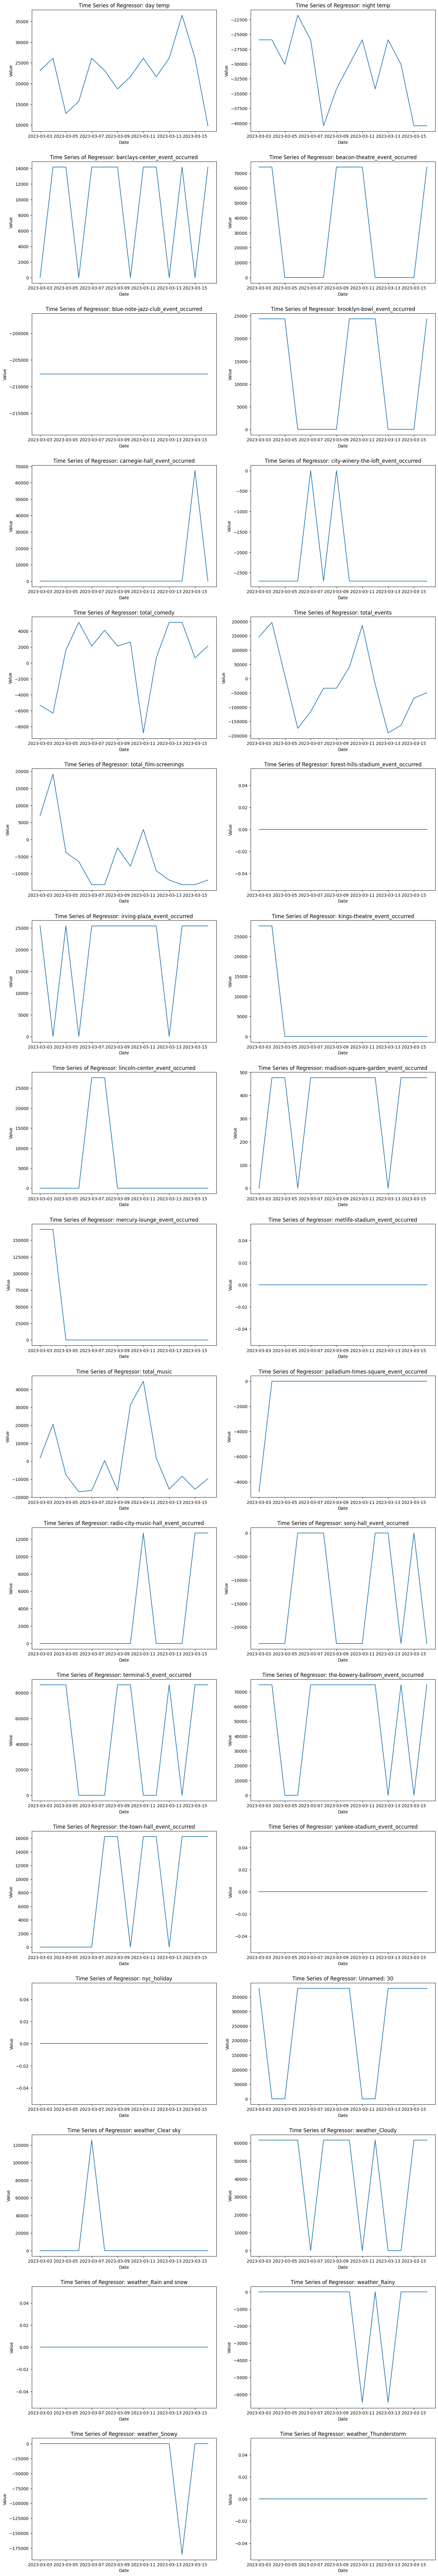

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have a fitted Prophet model named 'm' with extra regressors
# Access the regressor data from the testing set
regressor_data = forecast[['ds'] + list(m.extra_regressors.keys())]

# Determine the number of rows and columns for subplots
n_rows = (len(m.extra_regressors) + 1) // 2
n_cols = 2

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
fig.tight_layout(pad=5)

# Loop through each regressor and plot its time series data in a subplot
for i, regressor_name in enumerate(m.extra_regressors.keys()):
    row_idx = i // n_cols
    col_idx = i % n_cols
    ax = axes[row_idx, col_idx]
    ax.plot(regressor_data['ds'], regressor_data[regressor_name])
    ax.set_title(f'Time Series of Regressor: {regressor_name}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Value')

# Remove any unused subplots
if len(m.extra_regressors) % 2 != 0:
    axes[-1, -1].remove()

plt.show()

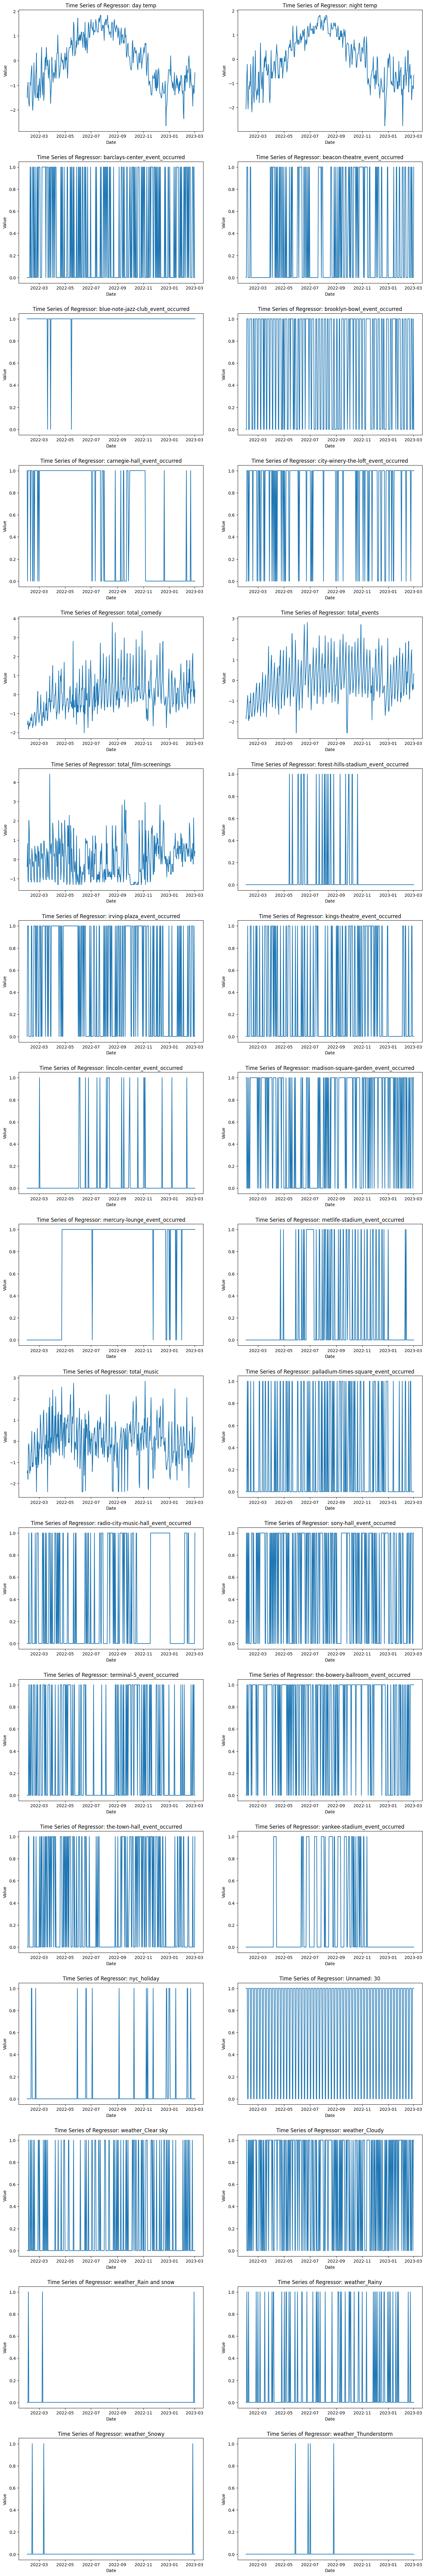

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have a fitted Prophet model named 'm' with extra regressors
# Access the regressor data
regressor_data = m.history

# Extract the names of the regressors
regressor_names = m.extra_regressors.keys()

# Determine the number of rows and columns for subplots
n_rows = (len(regressor_names) + 1) // 2
n_cols = 2

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
fig.tight_layout(pad=5)

# Loop through each regressor and plot its time series data in a subplot
for i, regressor_name in enumerate(regressor_names):
    row_idx = i // n_cols
    col_idx = i % n_cols
    ax = axes[row_idx, col_idx]
    ax.plot(regressor_data['ds'], regressor_data[regressor_name])
    ax.set_title(f'Time Series of Regressor: {regressor_name}')
    ax.set_xlabel('Date')
    ax.set_ylabel('Value')

# Remove any unused subplots
if len(regressor_names) % 2 != 0:
    axes[-1, -1].remove()

plt.show()
